In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from src.data.toy_data import *
from src.model.boosted_support_subset import *
from src.visualization.plots import *
from src.utils import *
from src.model.SupportSubsetEstimator import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Overlapping bivariate normals

In [40]:
# Parameters
seed1 = 1
seed2 = 2
n0 = 1000
n1 = 1000

# Dataset 8
mu0 = [0, 0]
sigma0 = [[80, 0], [0, 5]]
mu1 = [20, 3]
sigma1 = [[9, 2], [2, 9]]

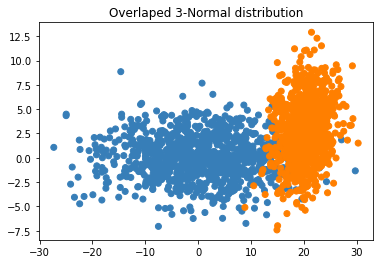

In [41]:
X, y = normal_generator2(mu0, sigma0, n0, mu1, sigma1, n1, seed1, seed2)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

In [42]:
ss_estimator = SupportSubsetEstimator()

In [43]:
ss_estimator.fit(X, y)

Searching best hyperparameters: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:23<00:00,  1.02it/s]


In [48]:
ss_estimator.best_params_

{'C': 10, 'gamma': 0.1}

## SVM

In [49]:
svm = SVC(**ss_estimator.best_params_)

In [50]:
svm.fit(X, y)

SVC(C=10, gamma=0.1)

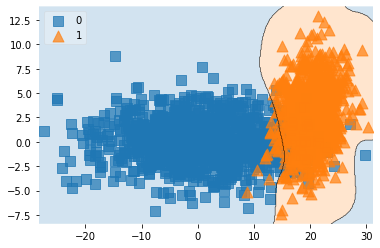

In [51]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

In [52]:
len(ss_estimator.supportsubset)

498

In [53]:
svm = SVC(**ss_estimator.best_params_)

In [54]:
svm.fit(X[ss_estimator.supportsubset], y[ss_estimator.supportsubset])

SVC(C=10, gamma=0.1)

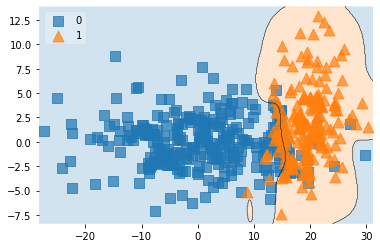

In [56]:
fig1 = plt.gcf()
custom_decision_region_plot(X[ss_estimator.supportsubset], y[ss_estimator.supportsubset], svm, title='')

In [57]:
ss_estimator.best_score_

(0.9599245058685526, 0.012720380134155084)

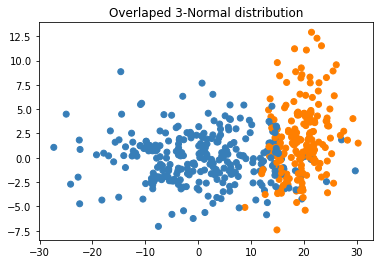

In [58]:
plot_toy_set(X[ss_estimator.supportsubset], y[ss_estimator.supportsubset], 'Overlaped 3-Normal distribution')